In [110]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import sys
sys.path.append('..')

In [80]:
import numpy as np
from numpy import exp, eye as I, trace as tr, diag, kron
from numpy.linalg import eigh, eig, inv

import matplotlib.pyplot as plt

%matplotlib notebook
np.set_printoptions(precision=5, linewidth=500, threshold=500, suppress=True)

import pandas as pd

In [69]:
from model.utils import vec, mat

In [68]:
def matrix_derivative_numerical(f, W):
    
    out = np.zeros_like(W)
    dx = 0.001
    
    T, M = W.shape
    
    for i in range(T):
        for j in range(M):
            
            W_ = W.copy()
            _W = W.copy()
            W_[i, j] += dx / 2
            _W[i, j] -= dx / 2
            out[i, j] = (f(W_) - f(_W)) / dx
    
    return out


def hessian_numerical(f, x):
    
    dx = 0.001
    N = len(x)
    out = np.zeros((N, N))
    
    for i in range(N):
        for j in range(N):
        
            def deriv(g, x, k):
                x_ = x.copy()
                _x = x.copy()
                x_[k] += dx / 2
                _x[k] -= dx / 2
                return (g(x_) - g(_x)) / dx 
                        
            out[i, j] = deriv(lambda y: deriv(f, y, i), x, j)
    
    return out

In [22]:
def get_K(N):
    return np.exp(-(np.linspace(0, 1, N)[:, None] - np.linspace(0, 1, N)[None, :]) ** 2)

In [43]:
T = 6
N = 4

T_ = 5
N_ = 3

ST = np.zeros((T_, T))
ST[range(T_), range(T_)] = 1

SN = np.zeros((N_, N))
SN[range(N_), range(N_)] = 1

sigT =  get_K(T_)
sigN = get_K(N_)

sigTi = inv(sigT)
sigNi = inv(sigN)

K = get_K(T)
Hs = get_K(N)

Ki = inv(K)
Hsi = inv(Hs)

gamma = 0.05

Y = np.random.normal(size=(N_, T_))
F = np.random.normal(size=(N, T))


In [92]:
def zeta(F):
    F = mat(F, shape=(N, T))
    return 0.5 * (tr((Y - SN @ F @ ST.T).T @ sigNi @ (Y - SN @ F @ ST.T) @ sigTi) + gamma * tr(Ki @ F.T @ Hsi @ F))

In [95]:
hess_analytic = kron(ST.T @ sigTi @ ST, SN.T @ sigNi @ SN ) + gamma * kron(Ki, Hsi)

hess_numeric = hessian_numerical(zeta, vec(F))

np.allclose(hess_analytic, hess_numeric)

True

In [153]:
inv(hess_analytic) @ B

array([[-0.00075, -0.01305,  0.01237,  0.00113, -0.03178,  0.03541, -0.01996,  0.08141, -0.12286, -0.07535,  0.27582, -0.42617,  0.10587, -0.42186,  0.63612],
       [-0.01248,  0.     ,  0.01681, -0.02353, -0.     ,  0.04555,  0.02162, -0.     , -0.14544,  0.05213,  0.     , -0.49972, -0.1025 ,  0.     ,  0.75107],
       [-0.00075,  0.01305,  0.01237,  0.00113,  0.03178,  0.03541, -0.01996, -0.08141, -0.12286, -0.07535, -0.27582, -0.42617,  0.10587,  0.42186,  0.63612],
       [ 0.02224,  0.01916,  0.00304,  0.04928,  0.04668,  0.0137 , -0.10019, -0.11957, -0.07211, -0.32058, -0.40507, -0.25949,  0.50762,  0.61954,  0.37721],
       [-0.0016 ,  0.00569, -0.00744, -0.00634,  0.00308, -0.01473,  0.00968, -0.01263,  0.03006, -0.0445 ,  0.16026, -0.24892,  0.12324, -0.48578,  0.73469],
       [-0.00014,  0.     , -0.00851, -0.01218, -0.     , -0.01435,  0.01266, -0.     ,  0.03183,  0.02863,  0.     , -0.29149, -0.11477,  0.     ,  0.86669],
       [-0.0016 , -0.00569, -0.00744, -0.00634

<IPython.core.display.Javascript object>


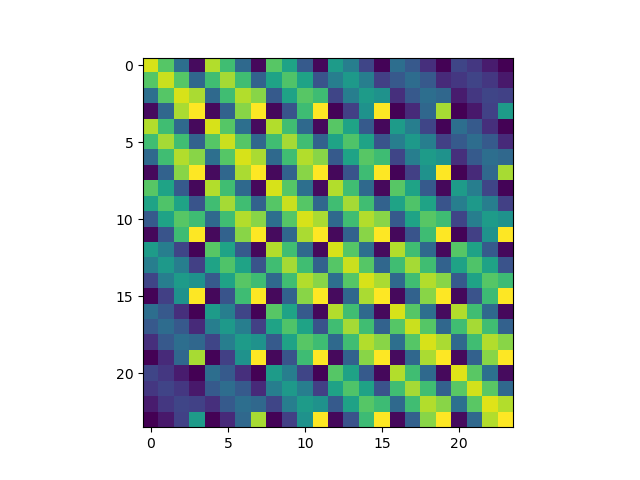

In [180]:
plt.figure()

AA = inv( kron(ST.T @ sigTi @ ST, SN.T @ sigNi @ SN ) + gamma * kron(Ki, Hsi))

plt.imshow(AA, vmin=0, vmax=1)



<IPython.core.display.Javascript object>


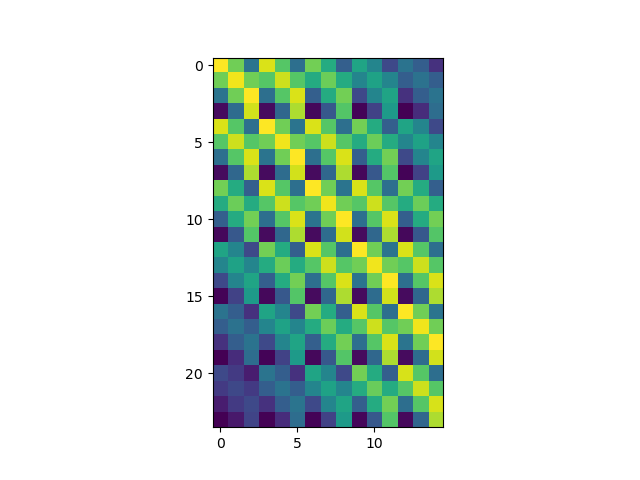

In [216]:
plt.figure()

plt.imshow(AA @ kron(ST.T, SN.T))



In [222]:
kron(K, Hs) @ kron(ST.T, SN.T) @ inv( kron(sigTi @ ST @ K @ ST.T, sigNi @ SN @ Hs @ SN.T) + gamma * kron(I(N_), I(T_)))

array([[0.93798, 0.73462, 0.36344, 0.88401, 0.69211, 0.34183, 0.73964, 0.57851, 0.28419, 0.5486 , 0.42846, 0.20872, 0.35976, 0.28052, 0.13524],
       [0.73462, 0.91937, 0.73462, 0.69211, 0.86679, 0.69211, 0.57851, 0.72622, 0.57851, 0.42846, 0.53993, 0.42846, 0.28052, 0.35528, 0.28052],
       [0.36344, 0.73462, 0.93798, 0.34183, 0.69211, 0.88401, 0.28419, 0.57851, 0.73964, 0.20872, 0.42846, 0.5486 , 0.13524, 0.28052, 0.35976],
       [0.02983, 0.33392, 0.87359, 0.02704, 0.31341, 0.82329, 0.0198 , 0.25864, 0.68866, 0.01138, 0.18752, 0.51053, 0.00478, 0.11929, 0.33451],
       [0.88401, 0.69211, 0.34183, 0.93815, 0.73473, 0.3635 , 0.88391, 0.69202, 0.34175, 0.73938, 0.57831, 0.28408, 0.5486 , 0.42846, 0.20872],
       [0.69211, 0.86679, 0.69211, 0.73473, 0.91946, 0.73473, 0.69202, 0.86671, 0.69202, 0.57831, 0.72601, 0.57831, 0.42846, 0.53993, 0.42846],
       [0.34183, 0.69211, 0.88401, 0.3635 , 0.73473, 0.93815, 0.34175, 0.69202, 0.88391, 0.28408, 0.57831, 0.73938, 0.20872, 0.42846, 0.

In [244]:
kron(K, Hs) @ inv(kron(ST.T @ sigTi @ ST @ K, SN.T @ sigNi @ SN @ Hs) + gamma * kron(I(N), I(T))) 

array([[0.93798, 0.73462, 0.36344, ..., 0.16192, 0.07734, 0.00134],
       [0.73462, 0.91937, 0.73462, ..., 0.20615, 0.16192, 0.06674],
       [0.36344, 0.73462, 0.93798, ..., 0.16192, 0.20787, 0.19304],
       ...,
       [0.16192, 0.20615, 0.16192, ..., 0.93122, 0.74408, 0.33821],
       [0.07734, 0.16192, 0.20787, ..., 0.74408, 0.94972, 0.88435],
       [0.00134, 0.06674, 0.19304, ..., 0.33821, 0.88435, 1.9889 ]])

In [310]:
lamK_, V_ = eig(ST.T @ sigTi @ ST @ K)
lamH_, U_ = eig(SN.T @ sigNi @ SN @ Hs)

V_i = inv(V_)
U_i = inv(U_)

J = 1 / (np.outer(lamH_, lamK_) + gamma)

kron(K, Hs) @ kron(V_, U_) @ diag(vec(J)) @ kron(V_i, U_i)

array([[0.93798, 0.73462, 0.36344, ..., 0.16192, 0.07734, 0.00134],
       [0.73462, 0.91937, 0.73462, ..., 0.20615, 0.16192, 0.06674],
       [0.36344, 0.73462, 0.93798, ..., 0.16192, 0.20787, 0.19304],
       ...,
       [0.16192, 0.20615, 0.16192, ..., 0.93122, 0.74408, 0.33821],
       [0.07734, 0.16192, 0.20787, ..., 0.74408, 0.94972, 0.88435],
       [0.00134, 0.06674, 0.19304, ..., 0.33821, 0.88435, 1.9889 ]])

In [252]:
def d(t):
    out = np.zeros((T, T))
    out[t, t] = 1
    return out

In [256]:
U_.shape

(4, 4)

In [277]:
t = 0

SSS = sum(kron(K @ V_ @ d(t) @ V_i, Hs @ U_ @ diag(J[:, t]) @ U_i) for t in range(T))

In [286]:
def diagi(A):
    return A[range(len(A)), range(len(A))]

In [303]:
diagi(SSS)

array([0.93798, 0.91937, 0.93798, 1.97316, 0.93815, 0.91946, 0.93815, 1.97328, 0.93784, 0.91919, 0.93784, 1.97292, 0.93815, 0.91946, 0.93815, 1.97328, 0.93798, 0.91937, 0.93798, 1.97316, 0.94972, 0.93122, 0.94972, 1.9889 ])

In [306]:
A = U_i.T * (Hs @ U_) @ J

In [307]:
B = (V_.T @ K) * V_i

In [308]:
A @ B

array([[0.93798, 0.93815, 0.93784, 0.93815, 0.93798, 0.94972],
       [0.91937, 0.91946, 0.91919, 0.91946, 0.91937, 0.93122],
       [0.93798, 0.93815, 0.93784, 0.93815, 0.93798, 0.94972],
       [1.97316, 1.97328, 1.97292, 1.97328, 1.97316, 1.9889 ]])

In [278]:
mat(SSS[range(N * T), range(N * T)], (N, T))

array([[0.93798, 0.93815, 0.93784, 0.93815, 0.93798, 0.94972],
       [0.91937, 0.91946, 0.91919, 0.91946, 0.91937, 0.93122],
       [0.93798, 0.93815, 0.93784, 0.93815, 0.93798, 0.94972],
       [1.97316, 1.97328, 1.97292, 1.97328, 1.97316, 1.9889 ]])

In [297]:
def a(t):
    return (U_i.T * (Hs @ U_)) @ J[:, t]

def b(t):
    return (K @ V_)[:, t] * (V_i.T)[:, t]

In [304]:
sum(a(t)[None, :] * b(t)[:, None] for t in range(T))

array([[0.93798, 0.91937, 0.93798, 1.97316],
       [0.93815, 0.91946, 0.93815, 1.97328],
       [0.93784, 0.91919, 0.93784, 1.97292],
       [0.93815, 0.91946, 0.93815, 1.97328],
       [0.93798, 0.91937, 0.93798, 1.97316],
       [0.94972, 0.93122, 0.94972, 1.9889 ]])

<IPython.core.display.Javascript object>


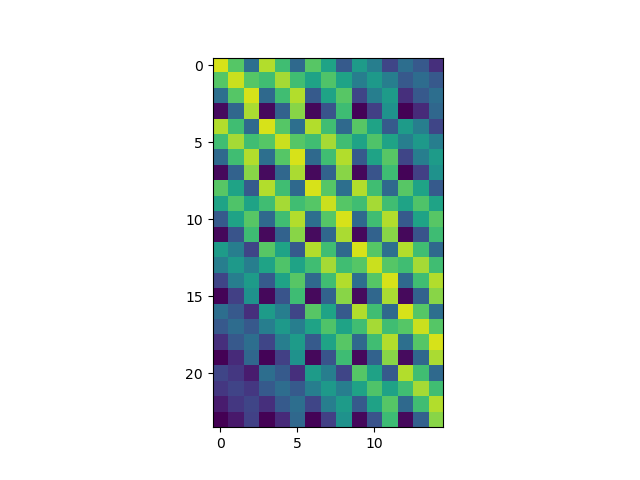

In [219]:
plt.figure()

BB = kron(K, Hs) @ B @ inv( B.T @ kron(K, Hs) @ B + gamma * kron(I(N_), I(T_))) @ kron(diag(lamSigT ** 0.5) @ Psi.T, diag(lamSigN ** 0.5) @ Phi.T)

plt.imshow(BB, vmin=0, vmax=1)

<IPython.core.display.Javascript object>


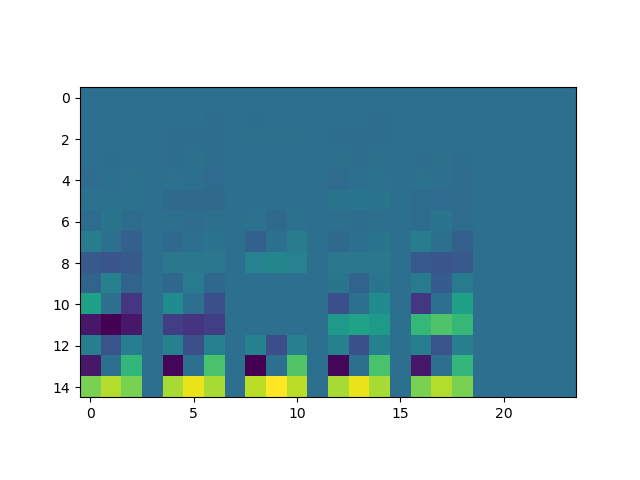

In [167]:
plt.figure()

plt.imshow(inv(B.T @ B) @ B.T)

In [106]:
lamSigT, Psi = eigh(sigT)
lamSigN, Phi = eigh(sigN)

In [113]:
Ai = kron(K, Hs)

In [111]:
B = kron(ST.T @ Psi @ diag(lamSigT ** -0.5), SN.T @ Phi @ diag(lamSigN ** -0.5) )

In [146]:
(Ai @ B @ (gamma * kron(I(N_), I(T_)) + B.T @ Ai @ B) ) 

array([[11260.86829,  -659.99955,  1137.96999,   220.41632,   -13.08508,    22.29278,   -20.03931,     1.17955,    -2.02564,    -2.1103 ,     0.12686,    -0.21361,     1.29267,    -0.07658,     0.13072],
       [11625.97119,    -0.     ,  1233.92504,   227.06589,     0.     ,    24.17674,   -20.67398,    -0.     ,    -2.19657,    -2.16924,    -0.     ,    -0.2317 ,     1.33215,     0.     ,     0.14177],
       [11260.86829,   659.99955,  1137.96999,   220.41632,    13.08508,    22.29278,   -20.03931,    -1.17955,    -2.02564,    -2.1103 ,    -0.12686,    -0.21361,     1.29267,     0.07658,     0.13072],
       [ 9942.49146,   969.27054,   889.26001,   195.58236,    19.21665,    17.41234,   -17.72262,    -1.73227,    -1.58268,    -1.88178,    -0.18631,    -0.16677,     1.14609,     0.11246,     0.10211],
       [ 9355.69976,  -543.20215,   944.87041,   115.22064,    -6.80613,    11.64956,   -17.60923,     1.02632,    -1.77886,    -1.15638,     0.06959,    -0.11706,     1.40195,    -0.0

In [149]:
B @ B.T

array([[ 1257.19492, -1572.96122,   762.52727, ...,     0.     ,     0.     ,     0.     ],
       [-1572.96122,  2762.73646, -1572.96122, ...,     0.     ,     0.     ,     0.     ],
       [  762.52727, -1572.96122,  1257.19492, ...,     0.     ,     0.     ,     0.     ],
       ...,
       [    0.     ,     0.     ,     0.     , ...,     0.     ,     0.     ,     0.     ],
       [    0.     ,     0.     ,     0.     , ...,     0.     ,     0.     ,     0.     ],
       [    0.     ,     0.     ,     0.     , ...,     0.     ,     0.     ,     0.     ]])

In [150]:
kron(ST.T @sigTi @ ST, SN.T @ sigNi @ SN)

array([[ 1257.19492, -1572.96122,   762.52727, ...,    -0.     ,     0.     ,     0.     ],
       [-1572.96122,  2762.73646, -1572.96122, ...,     0.     ,    -0.     ,     0.     ],
       [  762.52727, -1572.96122,  1257.19492, ...,    -0.     ,     0.     ,     0.     ],
       ...,
       [   -0.     ,     0.     ,    -0.     , ...,     0.     ,    -0.     ,     0.     ],
       [    0.     ,    -0.     ,     0.     , ...,    -0.     ,     0.     ,     0.     ],
       [    0.     ,     0.     ,     0.     , ...,     0.     ,     0.     ,     0.     ]])

In [151]:
B 


array([[  29.16321,  -14.72406,    5.88986,   10.29351,   -5.19703,    2.0789 ,   -3.515  ,    1.77467,   -0.7099 ,   -1.16481,    0.58809,   -0.23525,    0.35153,   -0.17748,    0.071  ],
       [ -48.70207,    0.     ,    7.0538 ,  -17.18999,    0.     ,    2.48972,    5.86999,   -0.     ,   -0.85018,    1.94521,   -0.     ,   -0.28174,   -0.58705,    0.     ,    0.08503],
       [  29.16321,   14.72406,    5.88986,   10.29351,    5.19703,    2.0789 ,   -3.515  ,   -1.77467,   -0.7099 ,   -1.16481,   -0.58809,   -0.23525,    0.35153,    0.17748,    0.071  ],
       [  -0.     ,   -0.     ,   -0.     ,   -0.     ,   -0.     ,   -0.     ,    0.     ,    0.     ,    0.     ,    0.     ,    0.     ,    0.     ,   -0.     ,   -0.     ,   -0.     ],
       [ -98.35995,   49.66044,  -19.86498,  -17.49854,    8.83475,   -3.53404,    1.29689,   -0.65478,    0.26192,   -0.6852 ,    0.34595,   -0.13838,    0.40768,   -0.20583,    0.08234],
       [ 164.25948,   -0.     ,  -23.79064,   29.22227,

In [152]:
ST.T @ ST

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.]])